# Breast Cancer Wisconsin (Diagnostic) Data Set


**Task : To predict whether the cancer is benign or malignant**

What Are the Symptoms of Breast Cancer?

New lump in the breast or underarm (armpit).

Thickening or swelling of part of the breast.

Irritation or dimpling of breast skin.


Redness or flaky skin in the nipple area or the breast.

Pulling in of the nipple or pain in the nipple area.

Nipple discharge other than breast milk, including blood.


# IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
import os 
warnings.filterwarnings("ignore")
import datetime


# LOADING THE DATASET

In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df.head()      #displaying the head of dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape       

(569, 33)

In [ ]:
df.columns     #displaying the columns of dataset

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe(percentiles=[0.1,0.25,0.45,0.55,0.75,0.95])      #description of dataset 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
10%,8.531554e+05,10.260000,14.078000,65.830000,321.600000,0.079654,0.049700,0.013686,0.011158,0.149580,0.055338,0.183080,0.640400,1.280200,13.160000,0.004224,0.009169,0.007726,0.005493,0.013012,0.001710,11.234000,17.800000,72.178000,384.720000,0.102960,0.093676,0.045652,0.038460,0.226120,0.065792,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
45%,9.013102e+05,12.996000,18.342000,84.066000,518.280000,0.094034,0.085074,0.052838,0.029998,0.175620,0.060962,0.298280,1.045000,2.151800,22.942000,0.006055,0.018588,0.022650,0.010370,0.018034,0.002920,14.432000,24.632000,94.352000,633.620000,0.128900,0.199100,0.193380,0.091348,0.275760,0.078160,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
55%,9.115064e+05,13.694000,19.362000,88.370000,578.060000,0.097734,0.101740,0.071450,0.040196,0.181840,0.062302,0.341720,1.189400,2.436200,26.906000,0.006630,0.022288,0.027898,0.011610,0.019368,0.003398,15.370000,26.008000,101.200000,726.860000,0.134700,0.231260,0.256000,0.109600,0.287140,0.081740,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


# VISUALIZING THE DATA

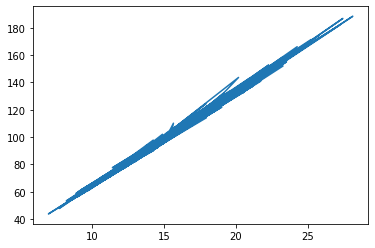

In [ ]:
plt.plot(df['radius_mean'], df['perimeter_mean'])
plt.show()

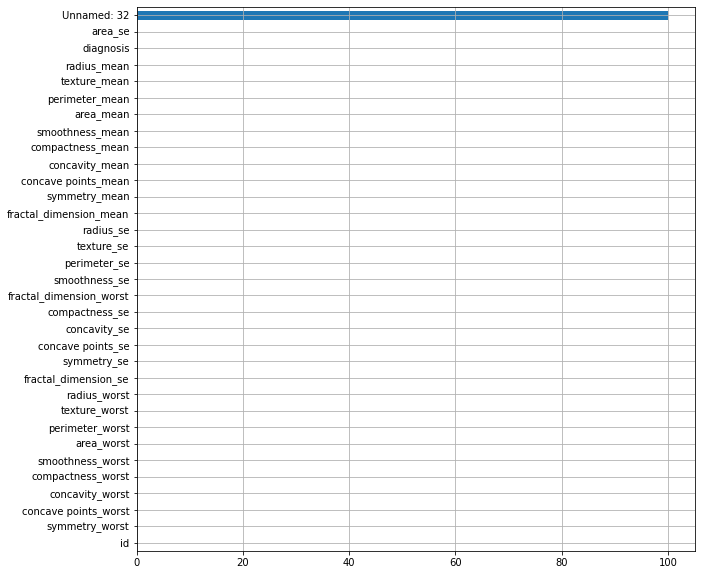

In [ ]:
#Visualizing the percentage missing value from dataset
((df.isnull().sum()/len(df))*100).sort_values(ascending=True).plot(kind='barh',figsize=(10,10))
plt.grid(b=True, which='both')

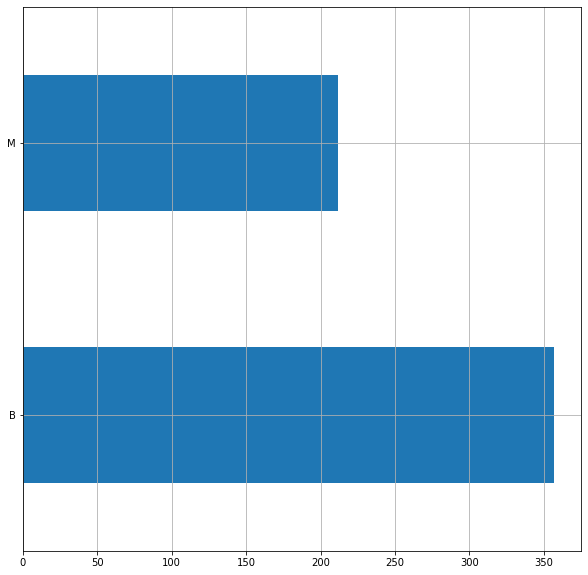

In [ ]:
#Count of cancer type
df['diagnosis'].value_counts().plot(kind='barh', figsize=(10,10))
plt.grid(b=True, which='both')

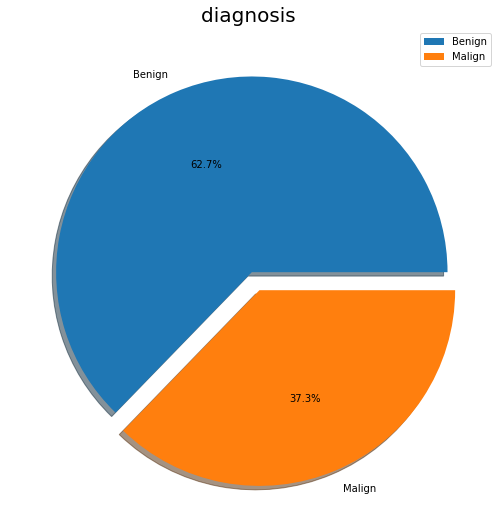

In [ ]:
plt.rcParams['figure.figsize'] = (9, 9)
labels=['Benign','Malign']
plt.pie(df['diagnosis'].value_counts(), explode=(0,0.1), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('diagnosis ', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
#To find the missing value in dataset
for i in df.columns:
    null_rate=df[i].isnull().sum()/len(df)
    if null_rate>0:
        print("{}'s null rate {} %'".format(i, round(null_rate,2)))

Unnamed: 32's null rate 1.0 %'


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


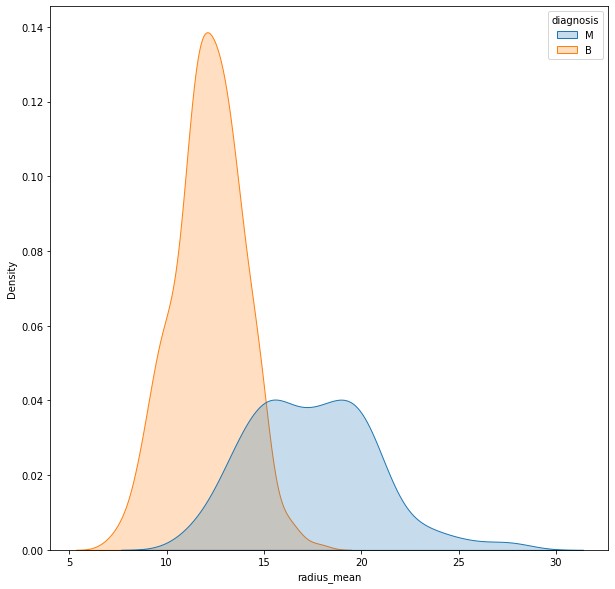

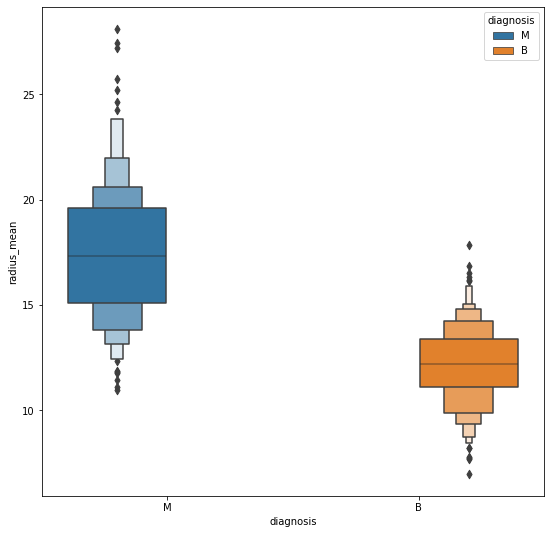

In [ ]:
#finding correlations
plt.figure(figsize=(10,10))
sns.kdeplot(df['radius_mean'], hue=df['diagnosis'],shade=True, legend=True)
plt.show()

sns.boxenplot(x=df['diagnosis'], y=df['radius_mean'], hue=df['diagnosis'])
plt.show()

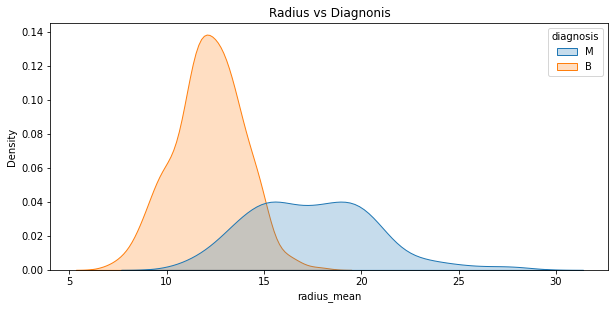

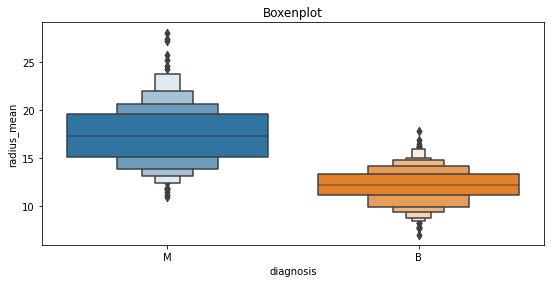

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.kdeplot(x=df['radius_mean'],hue=df['diagnosis'], shade=True, vertical=False, kernel=str, gridsize=100, legend=True,
           shade_lowest=True,cbar=True)
plt.title("Radius vs Diagnonis")
#plt.xlabel("Counts")
plt.show()

plt.subplot(2,1,2)
sns.boxenplot(y=df['radius_mean'],x=df['diagnosis'])
plt.title("Boxenplot")
#plt.xlabel("Counts")
plt.show()

<Figure size 720x720 with 0 Axes>

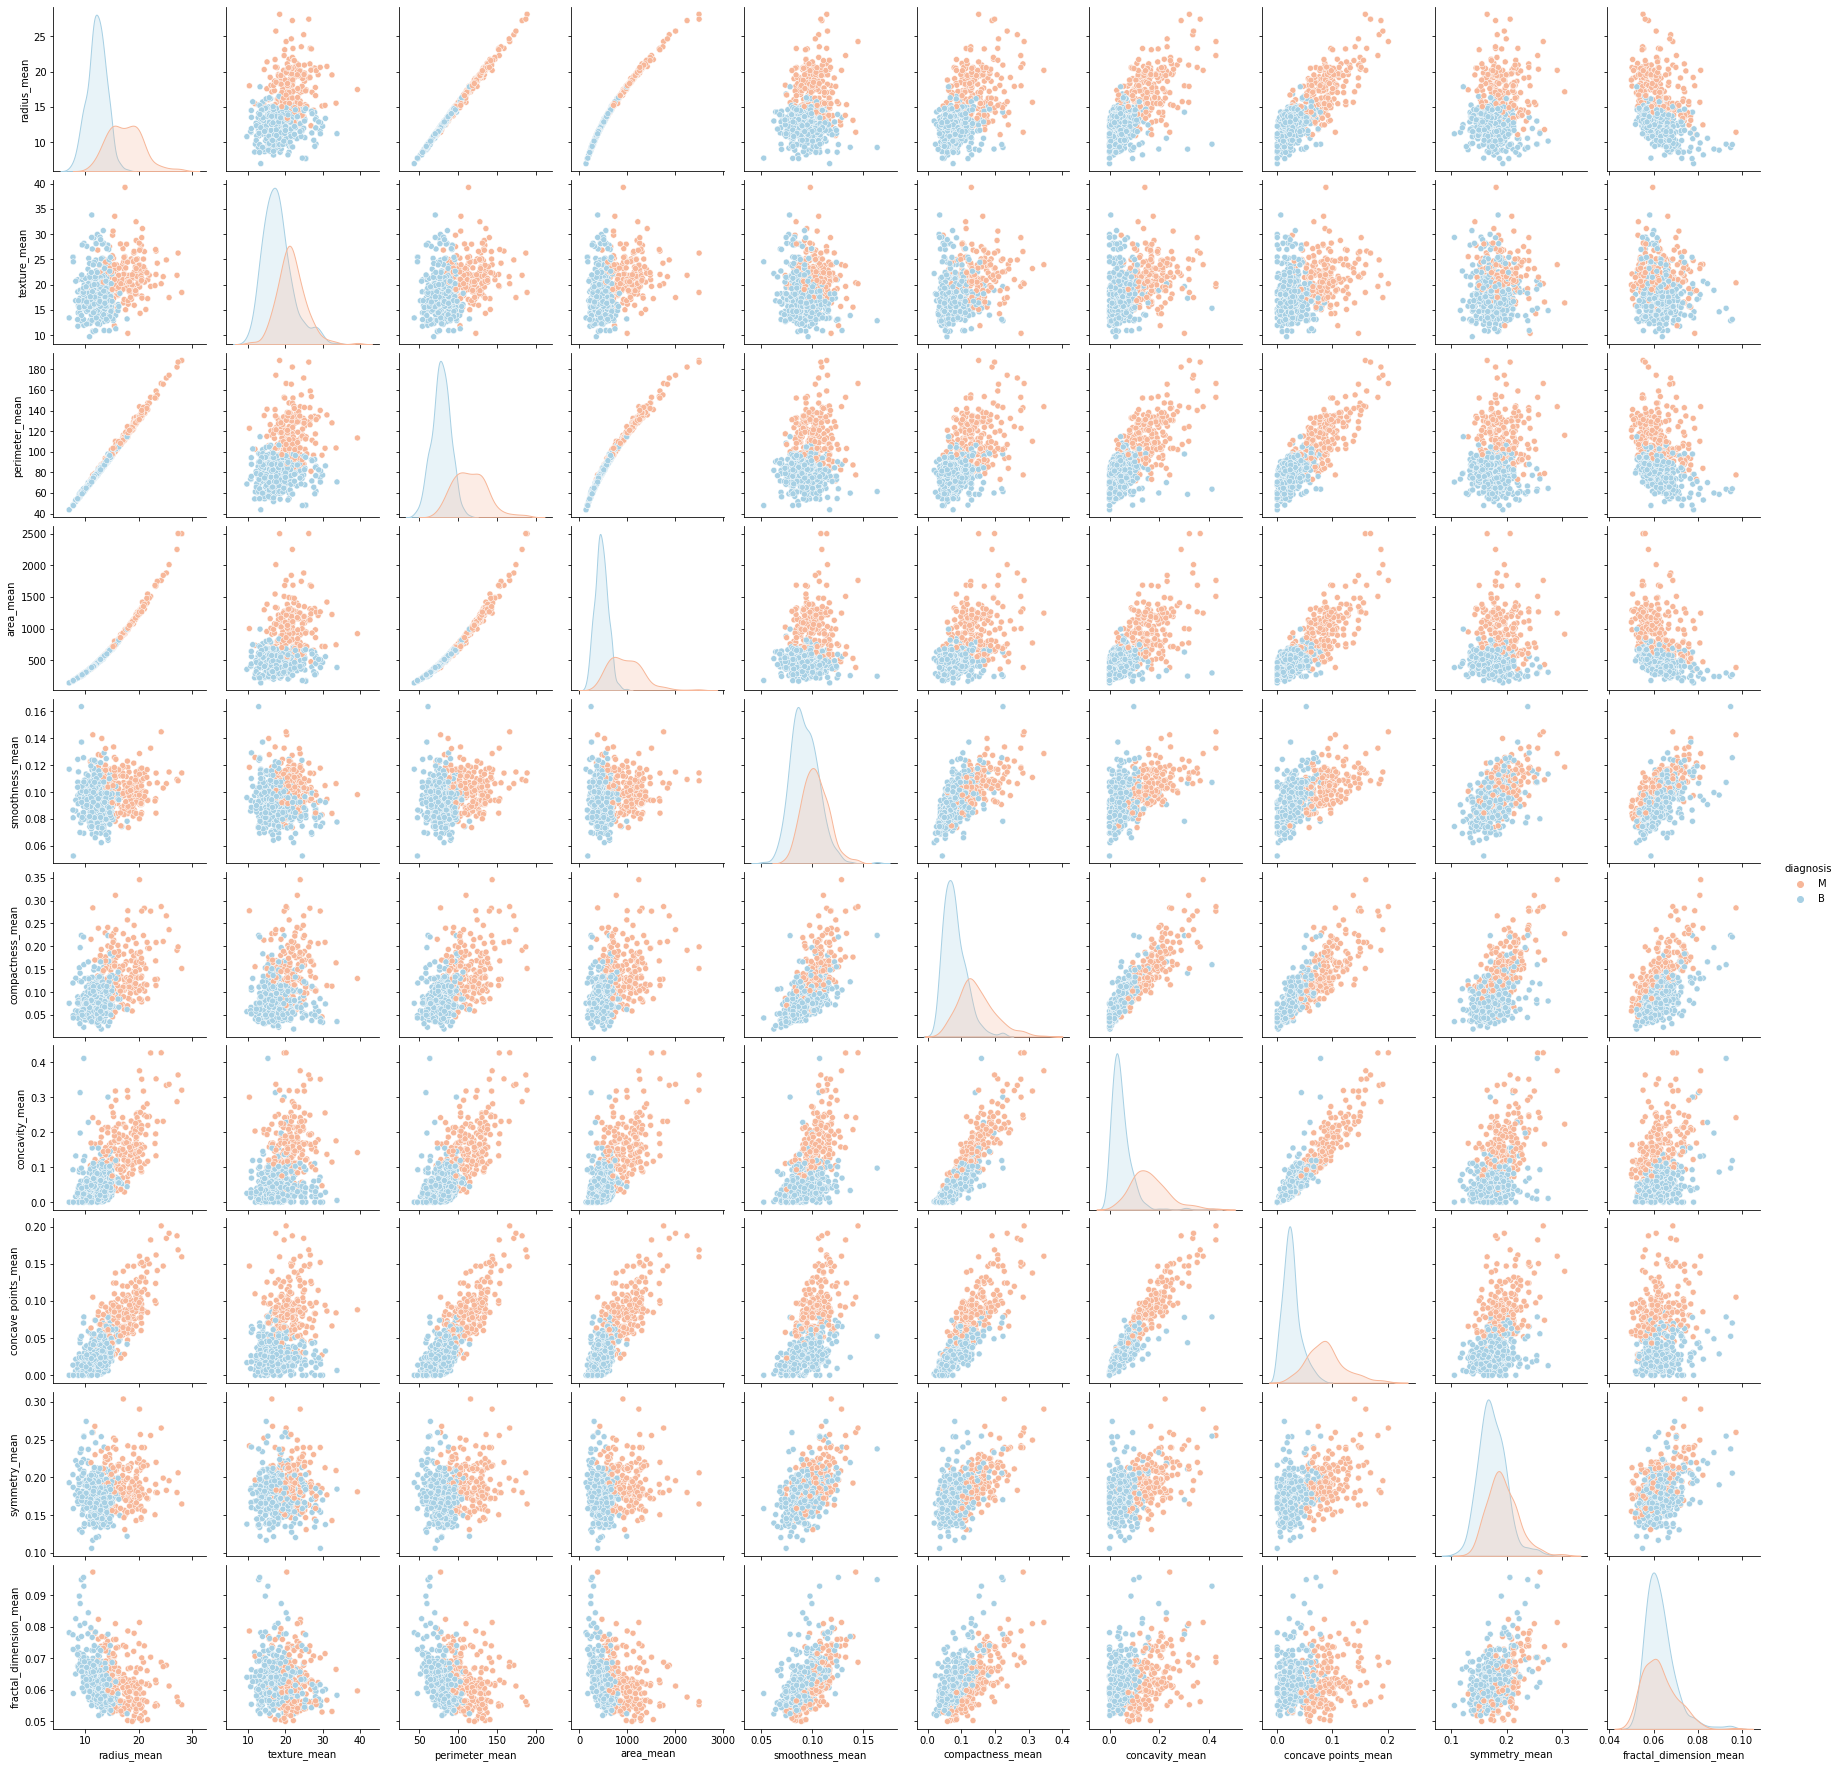

In [ ]:
#Visualization
# it is important to see the counts of different type of cancer
#Pairplot helps to plot among the most useful feature
cols=['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(10,10))
sns.pairplot(data=df[cols],hue='diagnosis', palette='RdBu')

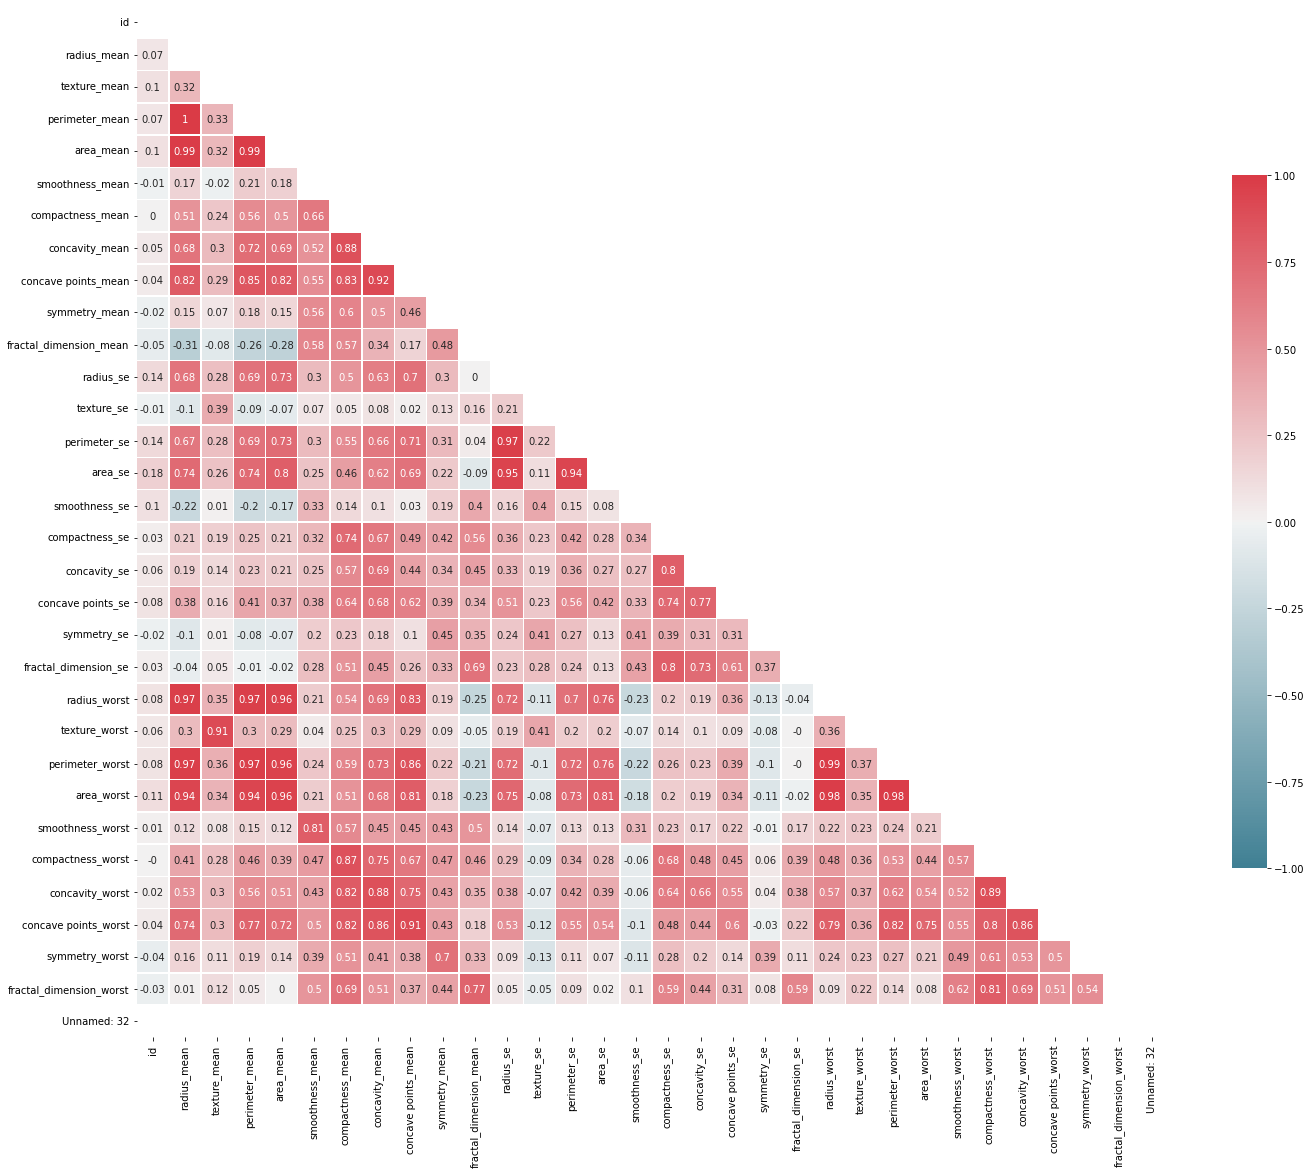

In [ ]:
# Heatmap to find the most correlated features
#generate the corellation matrix 
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [ ]:
#Dropping less important feature
#dropping all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']

df=df.drop(cols, axis=1)

In [ ]:
# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']

df=df.drop(cols, axis=1)

In [ ]:
# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se', 'Unnamed: 32'],
      dtype='object')

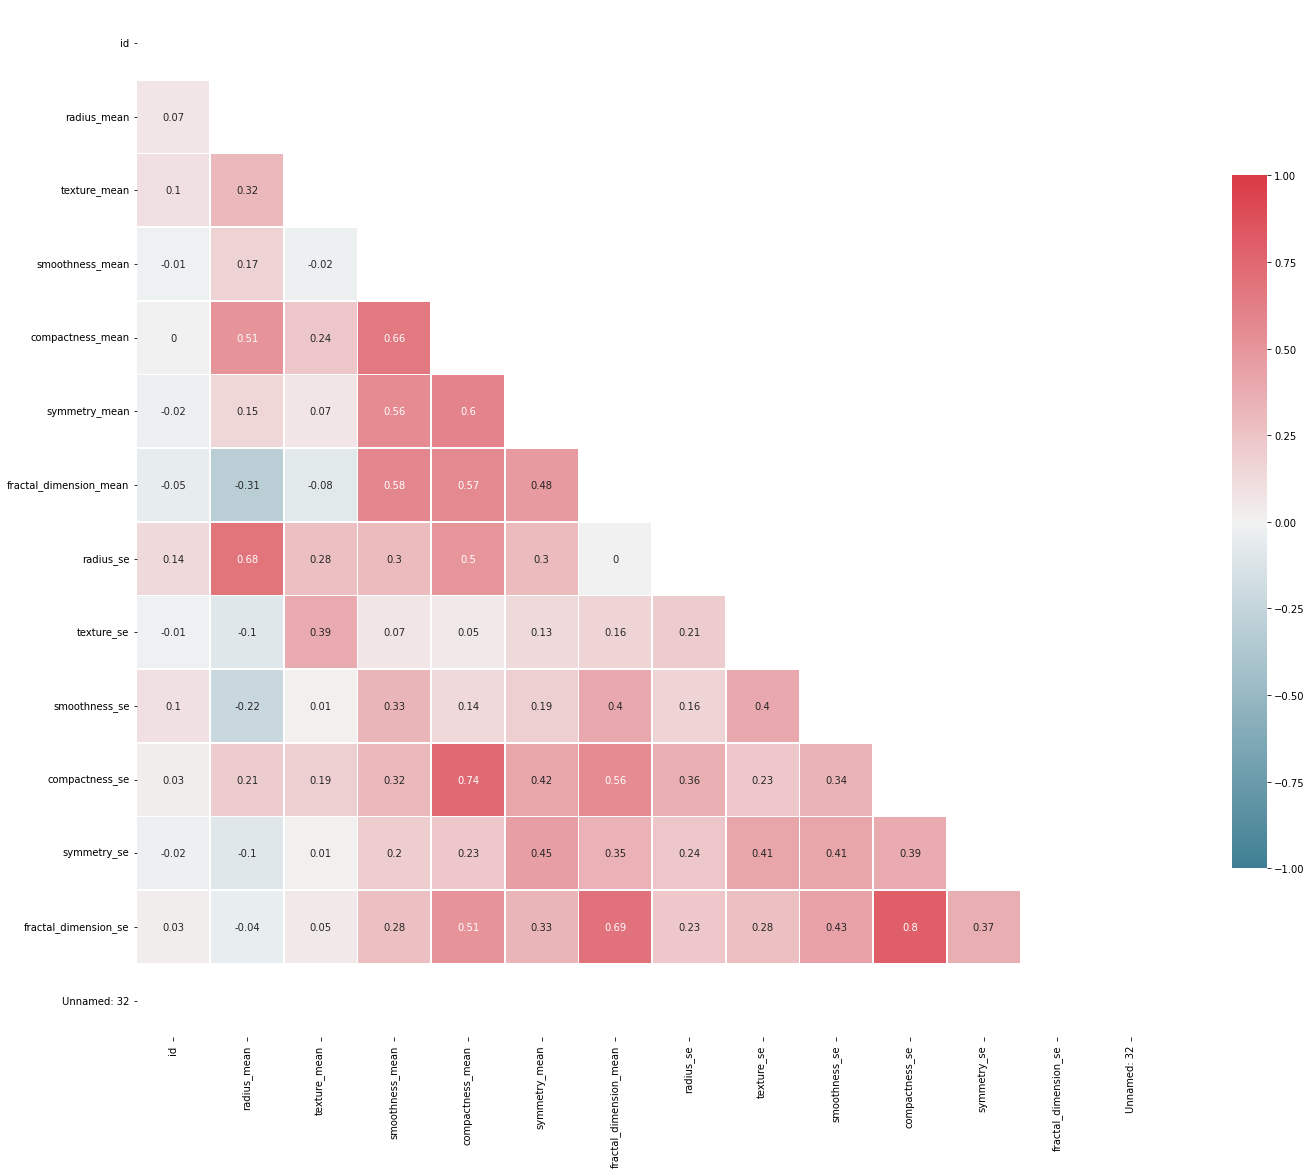

In [ ]:
#Correlation Matrix for the most important features
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

# PREPROCESSING OF DATA

In [ ]:
data=pd.read_csv('data.csv')
data.drop('Unnamed: 32', axis = 1, inplace = True)

**So we have to drop the Unnamed: 32 coulumn which contains NaN values**

# TRAINING AND TESTING DATA

In [ ]:
# Getting Features

x = data.drop(columns = 'diagnosis')

# Getting Predicting Value
y = data['diagnosis']


In [ ]:
print(x)
print(y)

           id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0      842302        17.99  ...          0.4601                  0.11890
1      842517        20.57  ...          0.2750                  0.08902
2    84300903        19.69  ...          0.3613                  0.08758
3    84348301        11.42  ...          0.6638                  0.17300
4    84358402        20.29  ...          0.2364                  0.07678
..        ...          ...  ...             ...                      ...
564    926424        21.56  ...          0.2060                  0.07115
565    926682        20.13  ...          0.2572                  0.06637
566    926954        16.60  ...          0.2218                  0.07820
567    927241        20.60  ...          0.4087                  0.12400
568     92751         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]
0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B


In [ ]:

#train_test_splitting of the dataset
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
print(len(x_train))


455


In [ ]:
print(len(x_test))

114


In [ ]:
print(len(y_train))

455


In [ ]:
print(len(y_test))

114


# MODELS

# 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)                         


LogisticRegression()

In [ ]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",reg.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           B       0.59      1.00      0.74        67
           M       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

[[67  0]
 [47  0]]
Training Score:  63.73626373626373


In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
512,M,B
457,B,B
439,B,B
298,B,B
37,B,B
...,...,...
213,M,B
519,B,B
432,M,B
516,M,B


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

58.77192982456141


**So we get a accuracy score of 58.7 % using logistic regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {
         'penalty':['l1','l2'],
         'C':[0.001, 0.01, 0.1, 1, 10, 20,100, 1000]
}
lr= LogisticRegression(penalty='l1')            #Lasso Regression
cv=GridSearchCV(lr,param,cv=5,n_jobs=-1)
cv.fit(x_train,y_train)
cv.predict(x_test)


array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

Logistic Regression with hyperparameter optimisation

In [ ]:
print("Best CV score", cv.best_score_*100)

Best CV score 63.73626373626373


# 2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print("Training Score: ",gnb.score(x_train,y_train)*100)
print(gnb.score(x_test,y_test))


              precision    recall  f1-score   support

           B       0.59      0.99      0.74        67
           M       0.67      0.04      0.08        47

    accuracy                           0.60       114
   macro avg       0.63      0.51      0.41       114
weighted avg       0.62      0.60      0.47       114

[[66  1]
 [45  2]]
0.5964912280701754
Training Score:  63.29670329670329
0.5964912280701754


**So we get a accuracy score of 63.29 % using Naive Bayes**

In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
512,M,B
457,B,B
439,B,B
298,B,B
37,B,B
...,...,...
213,M,M
519,B,B
432,M,B
516,M,B


# 3. KNeighborsClassifier



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",knn.score(x_train,y_train)*100)
print(knn.score(x_test,y_test))


              precision    recall  f1-score   support

           B       0.68      0.94      0.79        67
           M       0.81      0.36      0.50        47

    accuracy                           0.70       114
   macro avg       0.74      0.65      0.64       114
weighted avg       0.73      0.70      0.67       114

[[63  4]
 [30 17]]
Training Score:  80.21978021978022
0.7017543859649122


In [ ]:
print(accuracy_score(y_test,y_pred)*100)


70.17543859649122


**So we get a accuracy score of 70.17 % using KNeighborsClassifier**

# 4. DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123)

dtree.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=6, random_state=123)

In [ ]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",dtree.score(x_train,y_train)*100)



              precision    recall  f1-score   support

           B       0.97      0.94      0.95        67
           M       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[63  4]
 [ 2 45]]
Training Score:  99.34065934065934


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

94.73684210526315


**So we get a accuracy score of 94.73 % using Decision Tree Classifier**

# 5. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)



RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",rfc.score(x_train,y_train)*100)


              precision    recall  f1-score   support

           B       0.96      0.97      0.96        67
           M       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[65  2]
 [ 3 44]]
Training Score:  100.0


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

95.6140350877193


**So we get a accuracy score of 95.61 % using Random Forest Classifier**

# 6. AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)







AdaBoostClassifier()

In [ ]:
y_pred=adb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",adb.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        67
           M       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[67  0]
 [ 2 45]]
Training Score:  100.0


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

98.24561403508771


**So we get a accuracy score of 98.24 % using AdaBoostClassifier**

# Accuracy

**So now we conclude the accuracy of different models:**

**1. AdaBoost Classifier = 98.24 %**

**2. Random Forest Classifier =95.61 %**

**3. Decision Tree Classifier= 94.78 %**

**4. K Neighbours Classifier= 70.18 %**

**5. Naiye Bayes= 63.30 %**

**6. Logistic Regression = 58.82%**


**Ada Boost Classifier got the highest accuracy**

# Work Distribution

**So now we conclude with the split up of work:**

**1. Paper: Toshani, Sanjana, Susan**

**2. EDA: Sanjana**

**3. Models :**

**Sunaina - Logistic Regression, KNeighbours, Decision Tree, Random forest, AdaBoost**

**Toshani - Naive Bayes Model**
